In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import mean_squared_error, mean_absolute_error

ModuleNotFoundError: No module named 'tensorflow'

In [39]:
# Load the wine quality dataset into a pandas DataFrame
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")

# Check for any missing values or data inconsistencies
print(wine_data.isnull().sum())
print(wine_data.describe())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dio

In [40]:
# Split the dataset into training and testing sets
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
y = to_categorical(y, num_classes=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# Define the ANN model using TensorFlow
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(11,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1)
])

In [43]:
# Train the ANN model on the training data
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
35/35 [==============================] - 1s 7ms/step - loss: 0.1158 - val_loss: 0.0905
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0881 - val_loss: 0.0868
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0854 - val_loss: 0.0853
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0847 - val_loss: 0.0848
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0842 - val_loss: 0.0845
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0838 - val_loss: 0.0842
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0836 - val_loss: 0.0841
Epoch 8/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0835 - val_loss: 0.0841
Epoch 9/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0834 - val_loss: 0.0838
Epoch 10/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0833 - val_loss: 0.0840
Epoch 11/50
35/35 [

In [44]:
# Evaluate the performance of the trained model on the testing data
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error: ", mse)

15/15 [==============================] - 0s 2ms/step - loss: 0.0832
Mean Squared Error:  0.08324523270130157


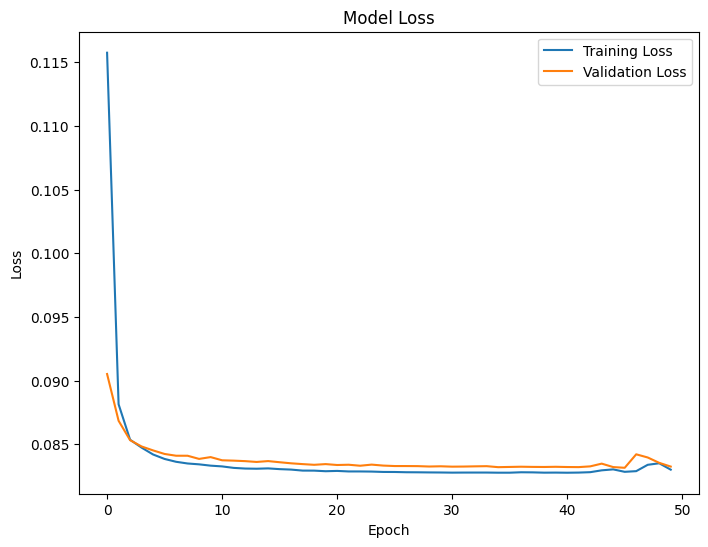

In [45]:
# Visualize the model's training and validation loss over epochs
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
mae = mean_absolute_error(X_test, y_test)

In [47]:
print("MAE:", mae)

MAE: 0.7918511855246081


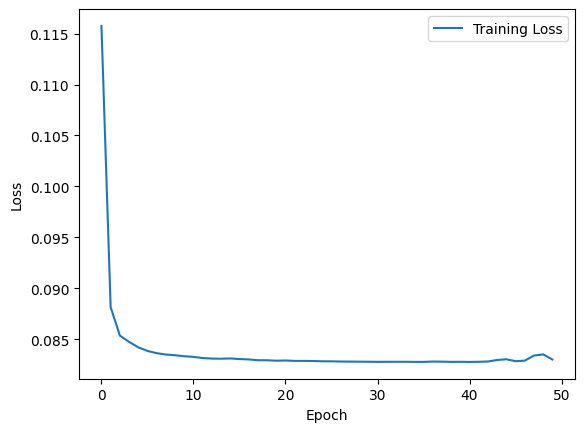

In [48]:
# Plot the training loss and validation loss over time
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()